In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sat Mar 11 21:33:02 2023

@author: Dipankar Santra
"""


'\nCreated on Sat Mar 11 21:33:02 2023\n\n@author: Dipankar Santra\n'

In [2]:
# =============================================================================
# K Nearest Neigbhour -- TeleCustomers Case Study
# =============================================================================

In [3]:

# =============================================================================
# Importing the librarie
# =============================================================================

In [4]:
import numpy as np # data processing
import matplotlib.pyplot as plt # plots 
import pandas as pd # data processing
from sklearn.neighbors import KNeighborsClassifier # K Nearest Neighbour Package
from sklearn import metrics # Classification Metrics
from sklearn import preprocessing # Scaling the data
from sklearn.model_selection import train_test_split # Splitting the data into train test
import os # working directory
from sklearn.model_selection import GridSearchCV


In [5]:
import warnings
warnings.filterwarnings('ignore') #this code when given some error not effects in programme.

In [6]:
# =============================================================================
# User Inputs
# =============================================================================

In [7]:
# Importing the dataset
os.chdir(R'C:\Users\dipan\OneDrive\Desktop\ivy all\MACHINE LEARNING\Day_12\KNN')
df = pd.read_csv('TeleCustomers.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [8]:
# =============================================================================
# There are 12 columns, namely as region, tenure, age, marital, address, income, 
#ed, employ, retire, gender, reside, and custcat. 

#We have a target column, ‘custcat’ categorizes the customers into four groups:

# 1- Basic Service
# 2- E-Service
# 3- Plus Service
# 4- Total Service
# =============================================================================

In [9]:
df.custcat.value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

In [10]:
# =============================================================================
# Pre-Processing Module
# =============================================================================


In [11]:
X = df.drop(['custcat'], axis = 1) # feature set # we divided different cluster we can drop the custcat table
X

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside
0,2,13,44,1,9,64.0,4,5,0.0,0,2
1,3,11,33,1,7,136.0,5,5,0.0,0,6
2,3,68,52,1,24,116.0,1,29,0.0,1,2
3,2,33,33,0,12,33.0,2,0,0.0,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4
...,...,...,...,...,...,...,...,...,...,...,...
995,3,10,39,0,0,27.0,3,0,0.0,1,3
996,1,7,34,0,2,22.0,5,5,0.0,1,1
997,3,67,59,0,40,944.0,5,33,0.0,1,1
998,3,70,49,0,18,87.0,2,22,0.0,1,1


In [12]:
y = df['custcat'] # dependent set

In [13]:
#Standard Scaling for all the Indepdent Features --> conver to float
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [14]:
# Dividing the data set into train and test
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)



In [15]:
# =============================================================================
# Building the KNN Module
# =============================================================================
""" Baseline Module on KNN """


' Baseline Module on KNN '

In [16]:
#Train Model and Predict
k = 4  # Initial Assingment of K-Nearest Neighbour
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)# fitting in training data set
Pred_y = neigh.predict(X_test) # predicting on test data
print("Baseline Accuracy of model at K=4 is",metrics.accuracy_score(y_test, Pred_y))


Baseline Accuracy of model at K=4 is 0.32


In [17]:

# =============================================================================
#  finding out the optimal k value: to improve the accuracy
# =============================================================================
""" Loop over the value of k to determine the lowest error/best accuracy model """

' Loop over the value of k to determine the lowest error/best accuracy model '

Minimum error:- 0.59 at K = 37


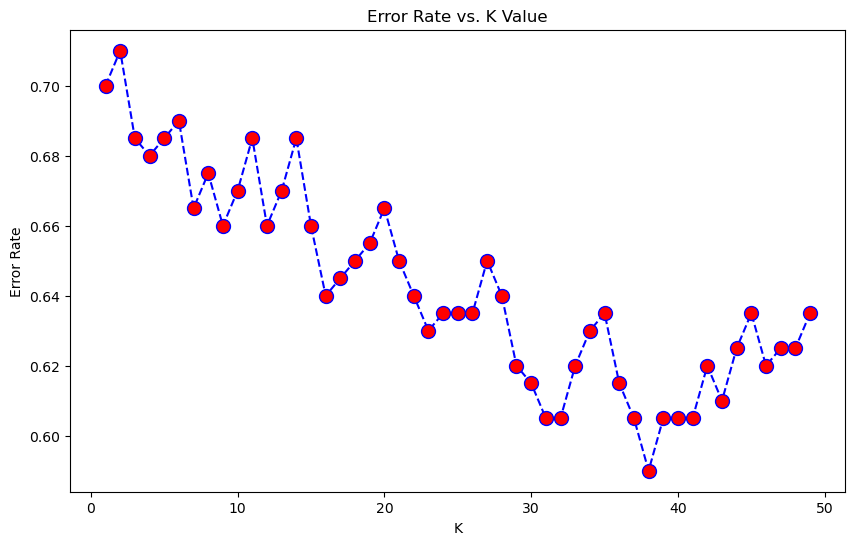

In [18]:
#by error rate
error_rate = [] # empty error rate list

for i in range(1,50):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))


Maximum accuracy:- 0.41 at K = 37


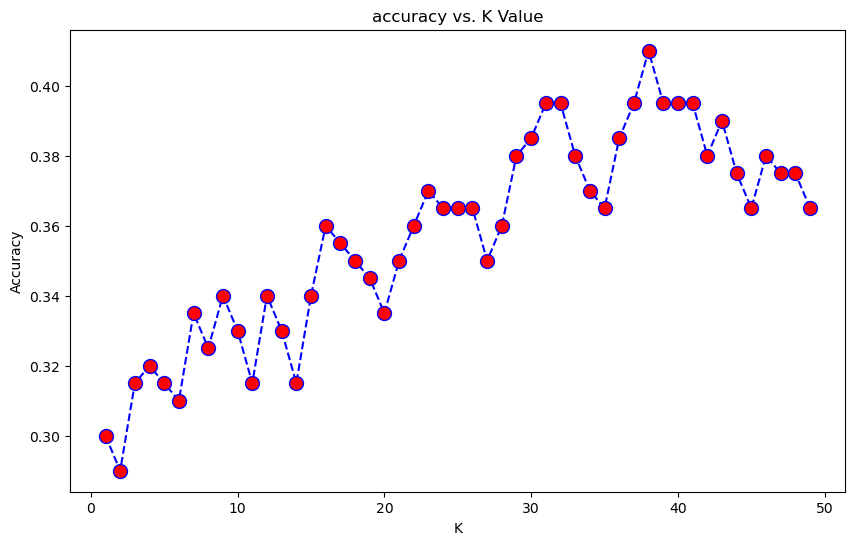

In [19]:
#by accuracy rate
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,50):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,50),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [20]:
# =============================================================================
# Hyperparameter tuning in KNN
# =============================================================================

In [21]:

leaf_size = list(range(1,40))# minimum no. of points in a given node
n_neighbors = list(range(1,40))

hyperparameters = dict(leaf_size= leaf_size,n_neighbors=n_neighbors)

In [22]:

#creating the instance of KNN
knn_hypertune = KNeighborsClassifier()

In [23]:
#Using Grid Search
knn_grid_search = GridSearchCV(knn_hypertune,hyperparameters,cv=10)


In [24]:
#Best Model
best_model =knn_grid_search.fit(X_train, y_train)

In [25]:
#Print the Hyperparameter Values:
print('Best Leaf Size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best Leaf Size:', best_model.best_estimator_.get_params()['n_neighbors'])

Pred_y_new = best_model.predict(X_test) # predicting on test data
print("Baseline Accuracy of model at K=4 is",metrics.accuracy_score(y_test, Pred_y_new))


Best Leaf Size: 1
Best Leaf Size: 94
Baseline Accuracy of model at K=4 is 0.34
